# Using Quantum circuits to generate and manipulate wavetables on SuperCollider
## Part 2 : SQ-PAM Y-Rotation Effect


#### This Notebook is a continuation of the Wavetables_SuperCollider-Part1.ipynb notebook. If you haven't learned how to connect Jupyter with SuperCollider or how to use the quantum audio module, please refer to the first part and the Quantum Audio Module Demo.

After exploring some purely "quantum loopback" effects, consisting of preparations directly succeded by measurements only, let's try to manipulate our audio in the quantum domain.


For this example, we are going to use another quantum audio scheme: SQ-PAM

Let's first just import the necessary libraries:

In [1]:
import numpy as np
from numpy import pi
import quantumaudio as qa
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from supercollider import Server, Buffer, Synth

Similarly to part 1, we are going to use a sinusoidal table (one period of a cosine function in this case), but we won't need as many qubits for now:

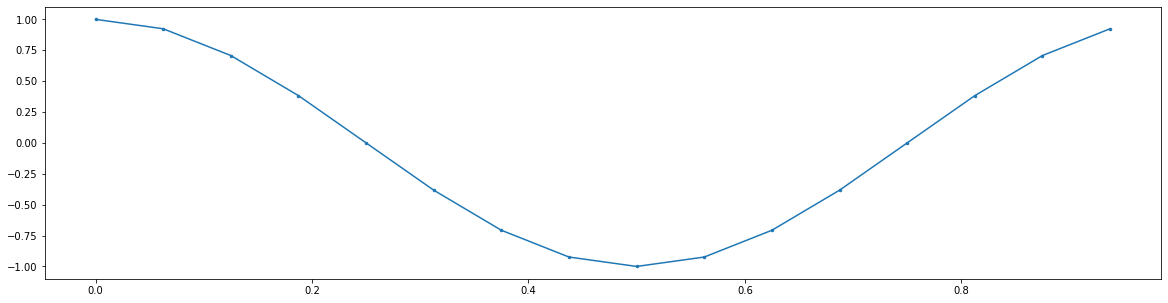

In [2]:
# Audio Sample / Table
qubit_size = 4
table_size = 2**qubit_size
t = np.linspace(0, 1-1/table_size, table_size)
sinewave = np.cos(2*np.pi*t)
plt.figure(figsize=(20,5))
plt.plot(t, sinewave, '.-', ms=5)
plt.show()

Then let's load this table in a 5-qubit SQ-PAM QuantumAudio object:

In [27]:
qsine = qa.QuantumAudio('sq-pam').load_input(sinewave)

For this input, the SQ_PAM representation will require:
         4 qubits for encoding time information and 
         1 qubits for encoding ampĺitude information.


In [62]:
def add_ry_sqpam(qa, angle, shots=100000):
    qa.prepare()
    qa.circuit.ry(angle, 0)
    qa.measure()
    qa.run(10000).reconstruct_audio()
    return qa.output

In [5]:
def add_rx_sqpam(qa, angle, shots=100000):
    qa.prepare()
    qa.circuit.rx(angle, 0)
    qa.measure()
    qa.run(100000).reconstruct_audio()
    return qa.output

In [6]:
def plot_out(out, color='darkblue'):
    plt.figure()
    plt.plot(out, color)
    plt.show()
    plt.close()

In [7]:
def toWavetable(signal):
    wavetable = np.zeros(2*len(signal))
    wavetable[0::2] = 2*signal - np.roll(signal, -1)
    wavetable[1::2] = np.roll(signal, -1) - signal
    return wavetable

In [8]:
def updateBuffer (buffer, signal):
    wavetable = toWavetable(signal)
    buffer.set(wavetable)

In [55]:
server = Server()

In [56]:
b = Buffer.alloc(server, 2*len(sinewave))

In [66]:
wavetable = sinewave
updateBuffer(b, wavetable)

In [65]:
synth = Synth(server, "qTable", {"buf" : b, "gain" : -25, "freq" : 250})

In [68]:
synth.free()

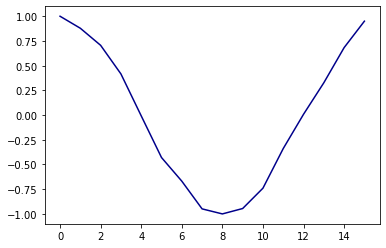

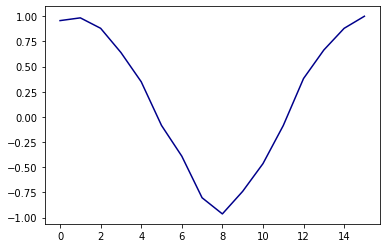

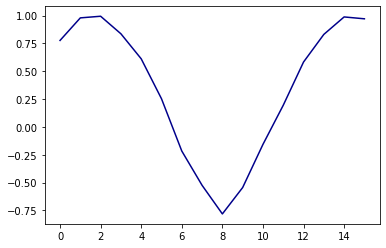

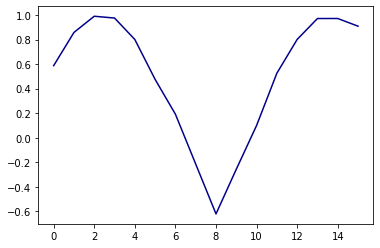

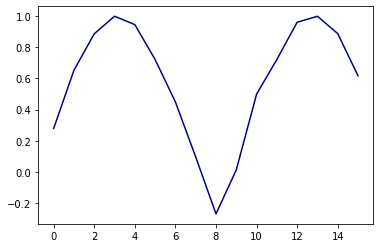

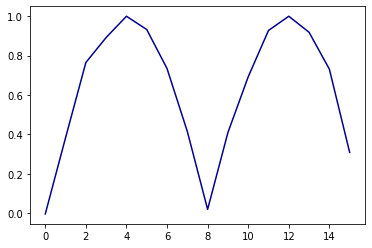

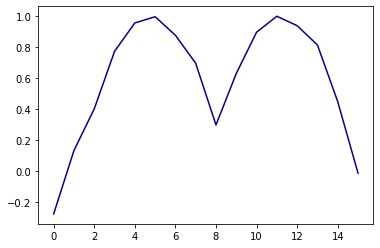

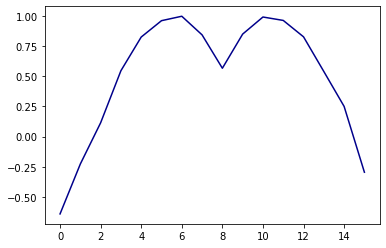

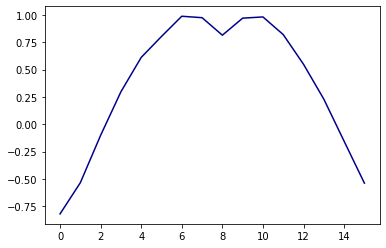

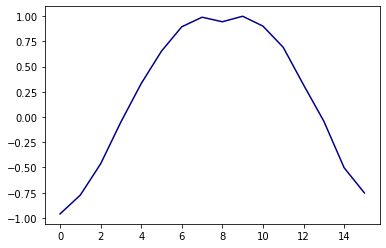

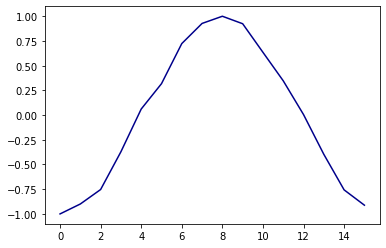

In [67]:
for i in [x*pi/10 for x in range(11)]:
    out = add_ry_sqpam(qsine, i)
    updateBuffer(b, out)
    plot_out(out)

In [1]:
out.circuit

NameError: name 'out' is not defined

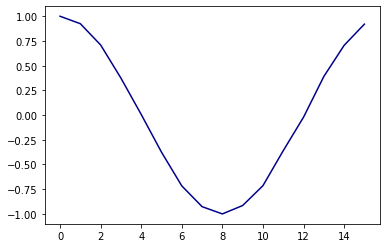

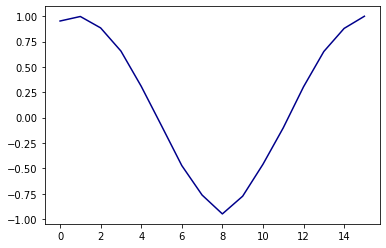

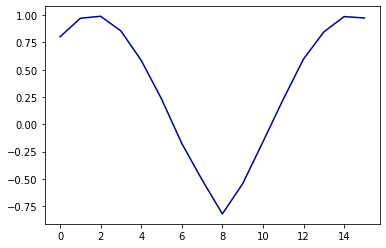

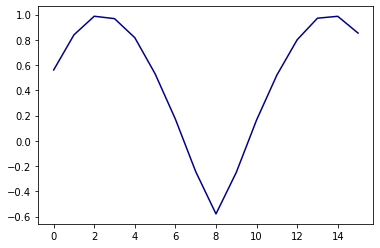

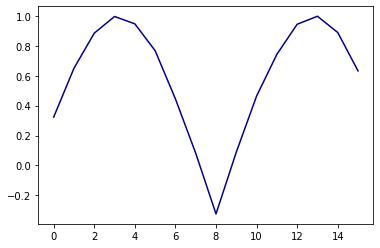

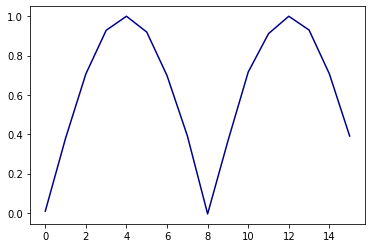

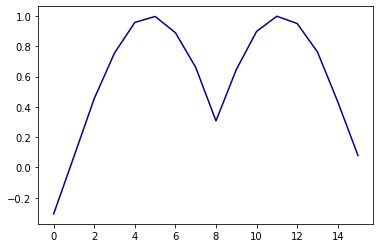

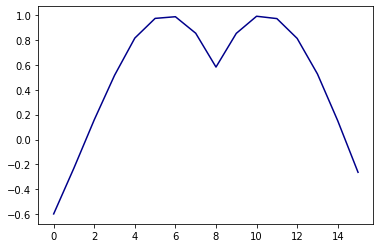

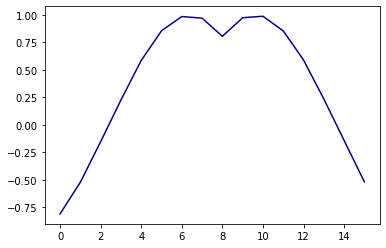

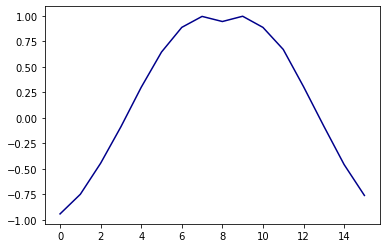

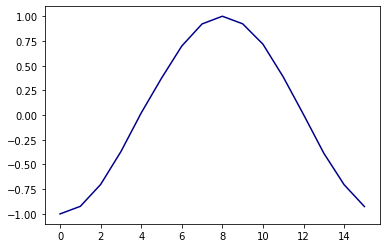

In [39]:
for i in [x*pi/10 for x in range(11)]:
    qsine.prepare()
    qsine.circuit.ry(angle, 0)
    qsine.measure()
    qsine.run(100000).reconstruct_audio()
    out = add_ry_sqpam(qsine, i, shots = 1000)
    updateBuffer(b, out)
    plot_out(out)

In [40]:
synth.free()

In [41]:
def dReS2 (qsize, sample, qa, SHOTS,aer_backend = 'qasm_simulator'):
    qa.prepare()
    qa.measure()
    
    # Execute the experiment 
    backend = Aer.get_backend(aer_backend)
    job = execute(dres_circuit, backend, shots=100000, memory=True)
    
    memory = job.result().get_memory()
    TABLES = np.zeros([len(SHOTS), 2**qsize])
    for i in range(len(SHOTS)):
        s = SHOTS[i]
        TABLES[i,:] = gain*np.sqrt(CountsToArray(Counter(memory[:s]), qsize, s)/s)
        TABLES[i,:] /= np.max(TABLES[i,:])/2
        TABLES[i,:] -= 1
#     TABLES[-1,:] = sample       
    return TABLES

In [ ]:
SHOTS =[1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 1000000]
# SHOTS =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 100000, 100000]
wavetables = dReS2(4, sinewave, qsine, SHOTS, np.linalg.norm((wm1+1)/2))

QuantumAudio run


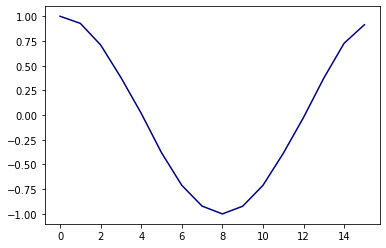

QuantumAudio run


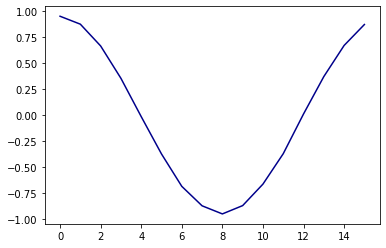

QuantumAudio run


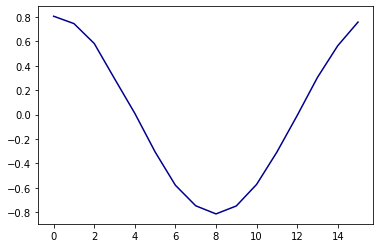

QuantumAudio run


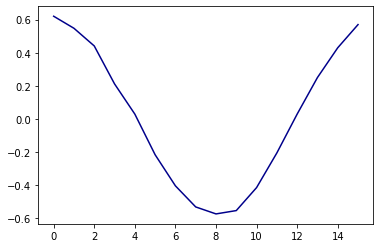

QuantumAudio run


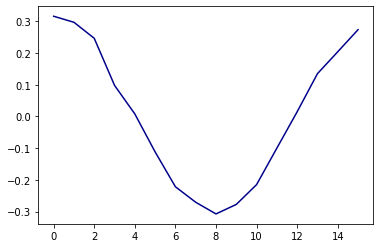

QuantumAudio run


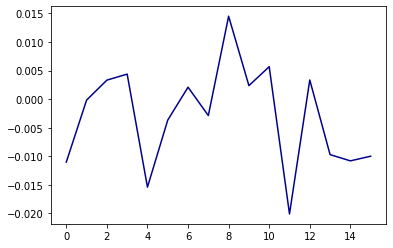

QuantumAudio run


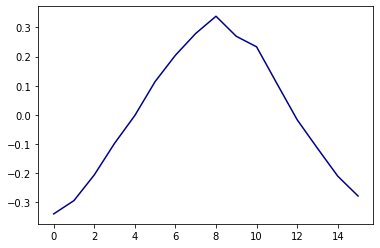

QuantumAudio run


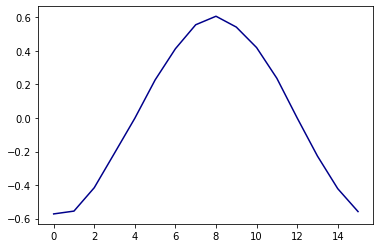

QuantumAudio run


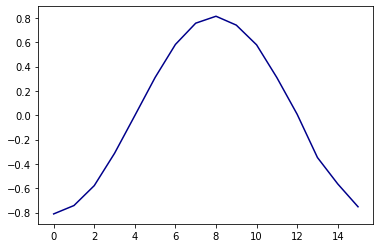

QuantumAudio run


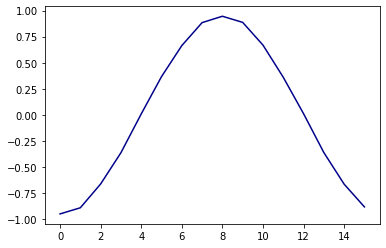

QuantumAudio run


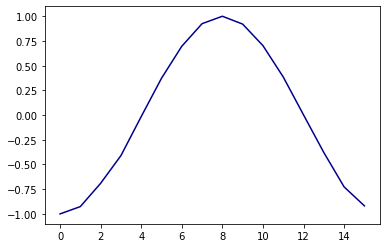

QuantumAudio run


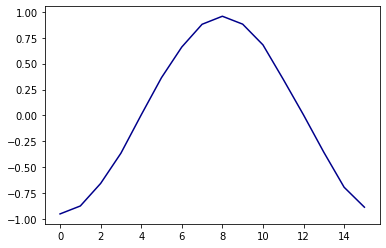

QuantumAudio run


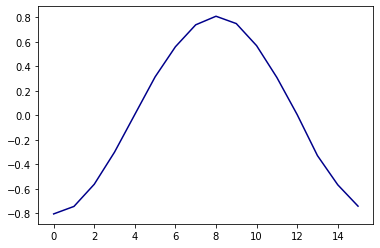

QuantumAudio run


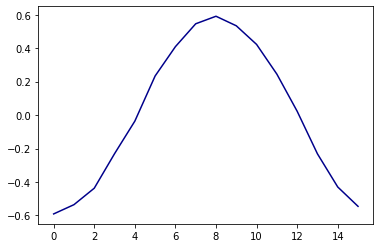

QuantumAudio run


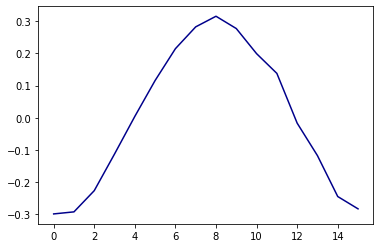

QuantumAudio run


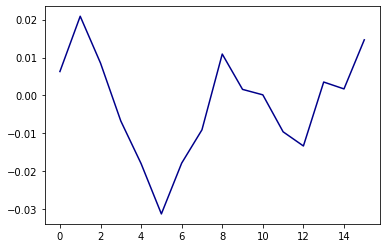

QuantumAudio run


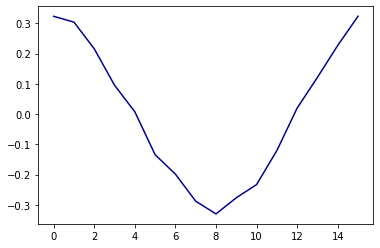

QuantumAudio run


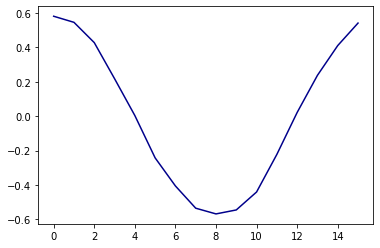

QuantumAudio run


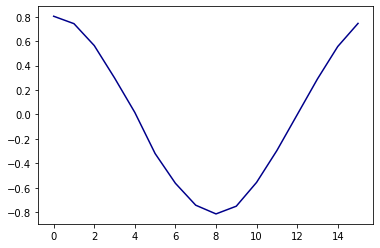

QuantumAudio run


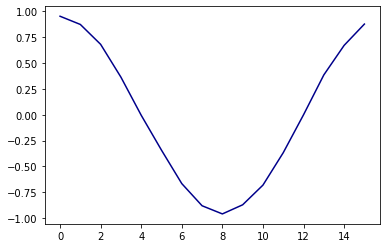

QuantumAudio run


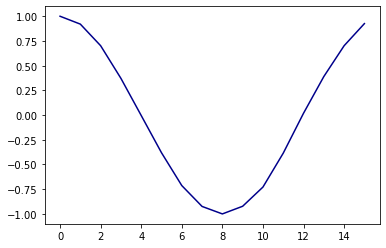

In [8]:
for i in [x*pi/10 for x in range(21)]:
    out = add_rx_sqpam(qsine, i)
    plot_out(out)

In [48]:
def add_cry_sqpam(qa, angle, control_qubit=1, shots=100000):
    qa.prepare()
    cry=QuantumCircuit(1)
    cry.ry(angle,0)
    qa.circuit.append(cry.to_gate().control(1), [control_qubit, 0])
    qa.measure()
    qa.circuit.draw()
    qa.run(100000).reconstruct_audio()
    return qa.output

QuantumAudio run


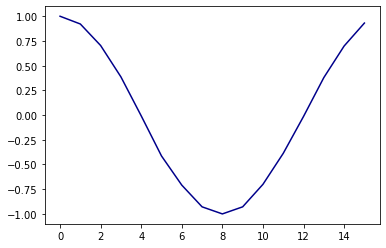

QuantumAudio run


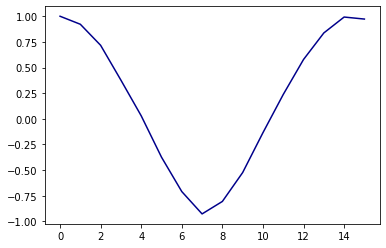

QuantumAudio run


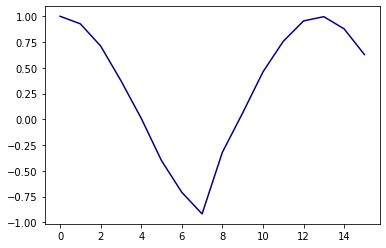

QuantumAudio run


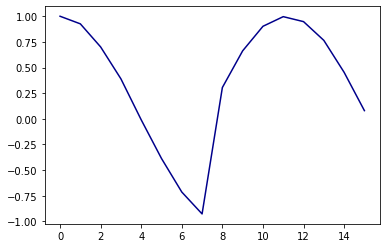

QuantumAudio run


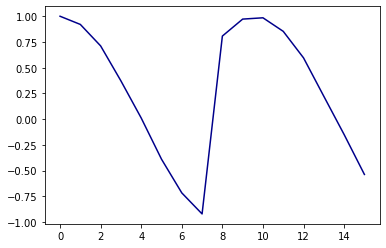

QuantumAudio run


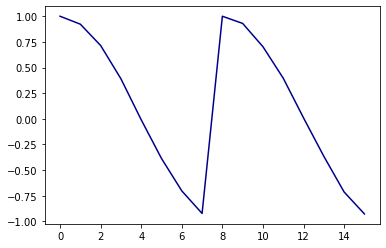

QuantumAudio run


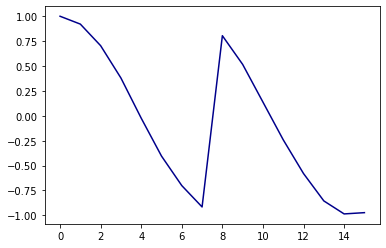

QuantumAudio run


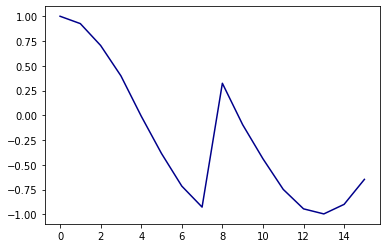

QuantumAudio run


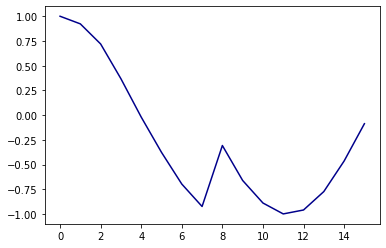

QuantumAudio run


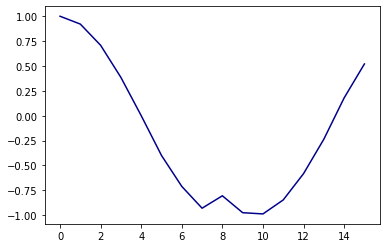

QuantumAudio run


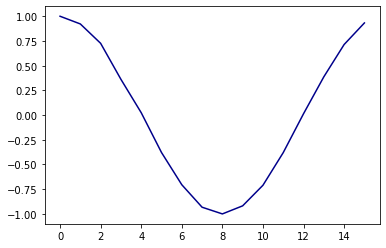

In [53]:
for i in [x*pi/5 for x in range(11)]:
    out = add_cry_sqpam(qsine, i, 4)
    plot_out(out)

In [76]:
def add_mcry_sqpam(qa, angle, shots=100000):
    qa.prepare()
    cry=QuantumCircuit(1)
    cry.ry(angle,0)
#     qa.circuit.ry(angle, 0)
#     qa.circuit.append(cry.to_gate().control(1), [5, 0])
    cry.ry(angle,0)
    qa.circuit.append(cry.to_gate().control(1), [4, 0])
    cry.ry(angle,0)
    qa.circuit.append(cry.to_gate().control(1), [3, 0])
    cry.ry(angle,0)
    qa.circuit.append(cry.to_gate().control(1), [2, 0])
    cry.ry(angle,0)
    qa.circuit.append(cry.to_gate().control(1), [1, 0])
    cry.ry(angle,0)
    qa.measure()
    qa.circuit.draw()
    qa.run(100000).reconstruct_audio()
    return qa.output

QuantumAudio run


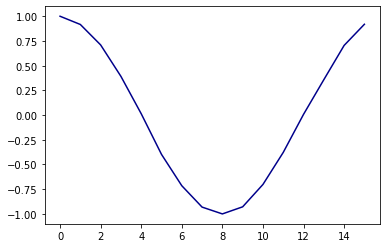

QuantumAudio run


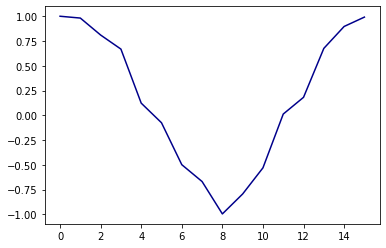

QuantumAudio run


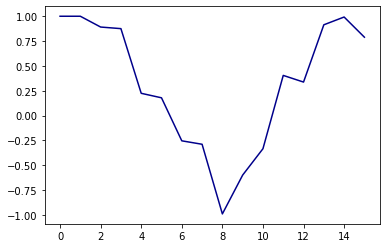

QuantumAudio run


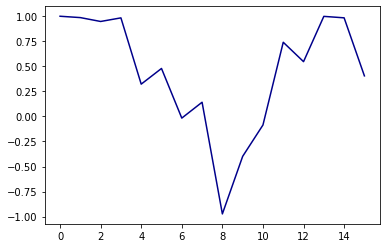

QuantumAudio run


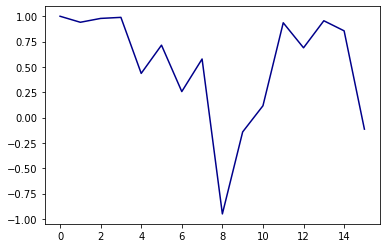

In [77]:
for i in [x*pi/85 for x in range(5)]:
    out = add_mcry_sqpam(qsine, i)
    plot_out(out)